In [315]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# **Importing data**

In [316]:
d1 = pd.read_csv("delivery_time.csv")
d1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [317]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Distribution

<ipython-input-318-8f9ed460b2cf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1["Delivery Time"])


<Axes: xlabel='Delivery Time', ylabel='Density'>

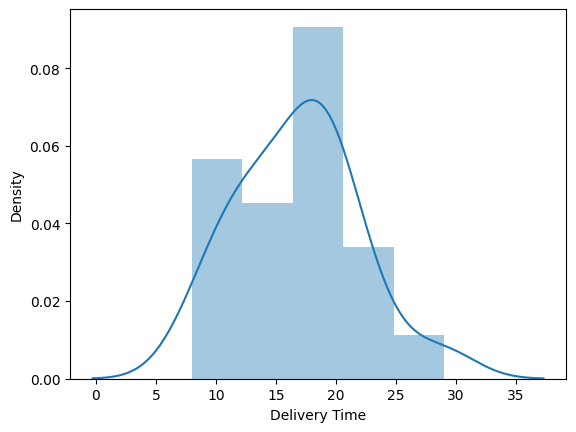

In [318]:
sns.distplot(d1["Delivery Time"])

<ipython-input-319-e2bef988a1de>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1["Sorting Time"])


<Axes: xlabel='Sorting Time', ylabel='Density'>

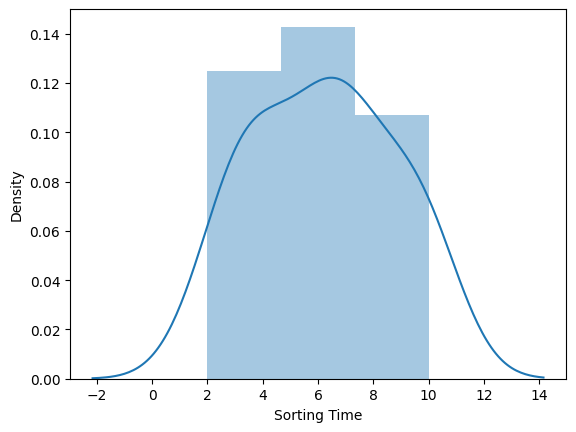

In [319]:
sns.distplot(d1["Sorting Time"])

# Feature engineering (EDA)

In [320]:
#Check for any null values
d1.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<Axes: >

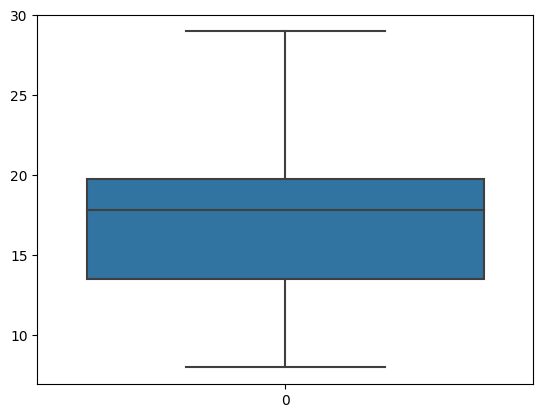

In [321]:
#Both columns are same unit
#Check for ouliers in Delivery time column
sns.boxplot(d1["Delivery Time"])

<Axes: >

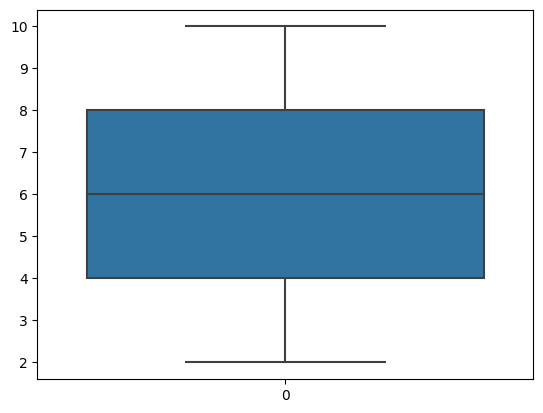

In [322]:
#Check for ouliers in Sorting time column
sns.boxplot(d1["Sorting Time"])

In [323]:
#No outliers present
#Renaming Delivery Time and Sorting Time
d1 = d1.rename(columns={"Delivery Time":"Delivery_time","Sorting Time":"Sorting_time"})
d1

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation analysis

In [324]:
d1.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


In [325]:
#Delivery time and sorting time has a positive correlation. Its value almost near to 1

<Axes: xlabel='Sorting_time', ylabel='Delivery_time'>

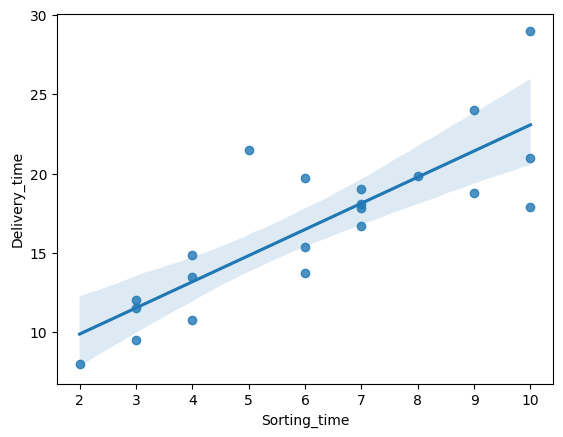

In [326]:
sns.regplot(x="Sorting_time", y="Delivery_time", data=d1)

# SLR Model Building

In [327]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_time~Sorting_time",data=d1).fit()

# Model Summary

In [328]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        14:38:25   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [329]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [330]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 Sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_time    0.000004
 dtype: float64)

In [331]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [332]:
#R squre value is low so creating other model
d1["log_Sorting_time"] =np.log(d1["Sorting_time"])
d1["log_Delivery_time"] = np.log(d1["Delivery_time"])
model2 = smf.ols("log_Delivery_time~log_Sorting_time",data=d1).fit()

In [333]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_Delivery_time   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.60e-07
Time:                        14:38:25   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7420      0.133     13.086      0.000       1.463       2.021
log_Sorting_time     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Sorting_time', ylabel='Delivery_time'>

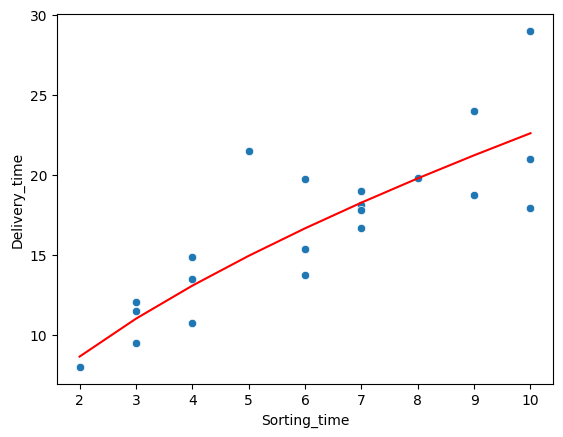

In [339]:
pred_Delivery_time = model2.predict(d1['log_Sorting_time'])
pred_Delivery_time = np.exp(pred_Delivery_time)
d1["Pred_Delivery_time"] = pred_Delivery_time
sns.scatterplot(x="Sorting_time",y="Delivery_time",data=d1)
sns.lineplot(x="Sorting_time",y=pred_Delivery_time,data=d1,color="red")

In [340]:
d1

,Delivery_time,Sorting_time,log_Sorting_time,log_Delivery_time,Pred_Delivery_time
0,21.00,10,2.302585,3.044522,22.597360
1,13.50,4,1.386294,2.602690,13.070123
2,19.75,6,1.791759,2.983153,16.653216
3,24.00,9,2.197225,3.178054,21.218593
4,29.00,10,2.302585,3.367296,22.597360
5,15.35,6,1.791759,2.731115,16.653216
6,19.00,7,1.945910,2.944439,18.259981
7,9.50,3,1.098612,2.251292,11.005911
8,17.90,10,2.302585,2.884801,22.597360
9,18.75,9,2.197225,2.931194,21.218593


# Model Prediction

In [335]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([np.log(5),np.log(8)])
new_data

0    1.609438
1    2.079442
dtype: float64

In [336]:
data_sort = pd.DataFrame(new_data,columns=["log_Sorting_time"])
data_sort

,log_Sorting_time
0,1.609438
1,2.079442


In [337]:
pred_val = model2.predict(data_sort)
pred_val

0    2.703662
1    2.984500
dtype: float64

In [338]:
Final_result = pd.DataFrame({'sorting_time': np.exp(data_sort['log_Sorting_time']),'Predicted_value' :np.exp(pred_val)})
Final_result

,sorting_time,Predicted_value
0,5.0,14.934324
1,8.0,19.776608
